In [1]:
import pandas as pd
import numpy as np
tb_veic = pd.read_csv('data/dados_veiculos.csv')

In [2]:
tb_veic.columns = [column.lower().replace(' ', '_').replace('/', '_by_') for column in tb_veic.columns]

In [3]:
tb_veic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make                        35952 non-null  object 
 1   model                       35952 non-null  object 
 2   year                        35952 non-null  int64  
 3   engine_displacement         35952 non-null  float64
 4   cylinders                   35952 non-null  float64
 5   transmission                35952 non-null  object 
 6   drivetrain                  35952 non-null  object 
 7   vehicle_class               35952 non-null  object 
 8   fuel_type                   35952 non-null  object 
 9   fuel_barrels_by_year        35952 non-null  float64
 10  city_mpg                    35952 non-null  int64  
 11  highway_mpg                 35952 non-null  int64  
 12  combined_mpg                35952 non-null  int64  
 13  co2_emission_grams_by_mile  359

In [4]:
for column in tb_veic.columns:
    print(f'{column}: {len(tb_veic[column].unique())}')

make: 127
model: 3608
year: 34
engine_displacement: 65
cylinders: 9
transmission: 45
drivetrain: 8
vehicle_class: 34
fuel_type: 13
fuel_barrels_by_year: 123
city_mpg: 48
highway_mpg: 49
combined_mpg: 46
co2_emission_grams_by_mile: 575
fuel_cost_by_year: 55


# Data Manipulation - Group By

- `.groupby()` é uma forma de **agregar** todos os resultados para cada chave única
- Sempre que você faz uma **agregação**, o resultado final terá 1 linha para cada valor pelo qual você agregou, portanto, é obrigatório que se aplique uma função agregadora para que todos os valores sejam sumarizados em um único valor associado àquela chave.

Por exemplo, se tivermos:

Fruta | Quantidade
-----|----:
Laranja | 10
Maçã | 10
Abacate | 2
Abacate | 1
Melancia  | 1
Laranja  | 4

O resultado de um `.groupby` por 'Fruta' resultaria em 4 linhas

Fruta | Função Agregadora
----|-----
Laranja | ?
Maçã | ?
Abacate | ?
Melancia | ?

O asterisco representa o valor agregado. Temos, obrigatoriamente, que sumarizar os dados relacionados àquele registro em um único dado. Para isso, podemos fazer a média, soma, contagem, ou qualquer outra função agregadora.

Fruta | soma(Quantidade)
----|----:
Laranja | 14
Maçã | 10
Abacate | 3
Melancia | 1

**Funções agregadora/Métodos**

- `.mean()`
- `.median()`
- `.max()`
- `.min()`
- `.sum()`
- `.count()`
- `.describe()`
- `.agg()`
- A function you want

## One aggregation

Key with one value and one aggregation method

In [5]:
tb_veic.groupby(by = 'drivetrain').mean()

,year,engine_displacement,cylinders,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year
drivetrain,,,,,,,,,
2-Wheel Drive,1984.434988,3.958392,6.156028,21.069467,15.624113,19.340426,17.009456,567.245856,2115.011820
"2-Wheel Drive, Front",2017.000000,2.000000,4.000000,11.771786,25.000000,33.000000,28.000000,315.000000,1450.000000
4-Wheel Drive,2013.137996,4.022306,6.364839,17.942952,16.913989,22.741966,19.077505,483.555289,1971.644612
4-Wheel or All-Wheel Drive,1998.014916,3.746917,6.143626,20.484720,15.035061,19.633708,16.744733,552.307814,2165.023835
All-Wheel Drive,2013.678274,3.299019,5.980383,16.349672,18.312898,25.597352,20.930358,439.612624,1863.217263
Front-Wheel Drive,2000.290632,2.353657,4.608172,14.266654,21.174563,28.616759,23.912220,385.094288,1503.131708
Part-time 4-Wheel Drive,2013.816456,4.543671,7.113924,20.628218,14.620253,19.088608,16.272152,556.205134,2131.645570
Rear-Wheel Drive,1999.801037,4.053245,6.643486,19.587486,15.422049,21.225680,17.526481,529.438424,2140.397611


In [6]:
tb_veic.groupby(by = 'drivetrain').median()

,year,engine_displacement,cylinders,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year
drivetrain,,,,,,,,,
2-Wheel Drive,1984.0,4.1,6.0,20.600625,15.0,19.0,16.0,555.437500,2100.0
"2-Wheel Drive, Front",2017.0,2.0,4.0,11.771786,25.0,33.0,28.0,315.000000,1450.0
4-Wheel Drive,2013.0,3.8,6.0,17.347895,17.0,22.0,19.0,475.000000,1950.0
4-Wheel or All-Wheel Drive,1999.0,3.6,6.0,20.600625,15.0,19.0,16.0,555.437500,2150.0
All-Wheel Drive,2014.0,3.0,6.0,15.695714,18.0,25.0,21.0,429.000000,1750.0
Front-Wheel Drive,2000.0,2.2,4.0,14.330870,20.0,28.0,23.0,386.391304,1450.0
Part-time 4-Wheel Drive,2014.0,4.3,7.0,20.600625,14.5,19.0,16.0,545.500000,2100.0
Rear-Wheel Drive,2000.0,4.0,6.0,19.388824,15.0,21.0,18.0,517.000000,2100.0


In [8]:
tb_veic

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [7]:
tb_agg_drivetrain = tb_veic.groupby(by = 'drivetrain').median()
type(tb_agg_drivetrain)

pandas.core.frame.DataFrame

In [9]:
tb_agg_drivetrain.loc['4-Wheel or All-Wheel Drive',:]

year                          1999.000000
engine_displacement              3.600000
cylinders                        6.000000
fuel_barrels_by_year            20.600625
city_mpg                        15.000000
highway_mpg                     19.000000
combined_mpg                    16.000000
co2_emission_grams_by_mile     555.437500
fuel_cost_by_year             2150.000000
Name: 4-Wheel or All-Wheel Drive, dtype: float64

## More than one aggregation

Key with one or more values and one or more aggregation methods

In [10]:
tb_agg_cyldt = tb_veic.groupby(by = ['drivetrain', 'cylinders']).median()

In [14]:
tb_agg_cyldt

year  engine_displacement  \
drivetrain                 cylinders                                
2-Wheel Drive              4.0        1984.0                  2.2   
                           6.0        1984.0                  4.1   
                           8.0        1984.0                  5.2   
2-Wheel Drive, Front       4.0        2017.0                  2.0   
4-Wheel Drive              4.0        2014.0                  2.4   
                           5.0        2011.0                  3.7   
                           6.0        2013.0                  3.6   
                           8.0        2013.0                  5.4   
                           12.0       2016.0                  6.0   
4-Wheel or All-Wheel Drive 3.0        1991.0                  1.2   
                           4.0        1995.0                  2.3   
                           5.0        2005.0                  2.5   
                           6.0        2001.0                  3.5   
                           8.0        1999.0                  5.3   
                           10.0       2007.0                  5.0   
                           12.0       2006.0                  6.0   
                           16.0       2007.0                  8.0   
All-Wheel Drive            3.0        2015.0                  1.5   
                           4.0        2015.0                  2.0   
                           5.0        2015.0                  2.5   
                           6.0        2014.0                  3.5   
                           8.0        2013.0                  4.4   
                           10.0       2012.0                  5.2   
                           12.0       2013.0                  6.0   
                           16.0       2012.5                  8.0   
Front-Wheel Drive          3.0        1991.0                  1.0   
                           4.0        2000.0                  2.0   
                           5.0        2004.0                  2.4   
                           6.0        2001.0                  3.1   
                           8.0        1998.0                  4.6   
Part-time 4-Wheel Drive    4.0        2014.0                  2.7   
                           6.0        2014.5                  3.6   
                           8.0        2013.0                  5.7   
                           12.0       2015.0                  6.3   
Rear-Wheel Drive           2.0        1993.0                  1.3   
                           3.0        2012.5                  1.0   
                           4.0        1992.0                  2.3   
                           5.0        2007.0                  3.7   
                           6.0        2001.0                  3.5   
                           8.0        2001.0                  5.2   
                           10.0       2008.0                  6.8   
                           12.0       2007.0                  5.9   

                                      fuel_barrels_by_year  city_mpg  \
drivetrain                 cylinders                                   
2-Wheel Drive              4.0                   15.491557      20.0   
                           6.0                   21.974000      14.0   
                           8.0                   25.354615      12.0   
2-Wheel Drive, Front       4.0                   11.771786      25.0   
4-Wheel Drive              4.0                   14.330870      21.0   
                           5.0                   18.311667      16.0   
                           6.0                   16.480500      18.0   
                           8.0                   20.600625      14.0   
                           12.0                  27.467500      11.0   
4-Wheel or All-Wheel Drive 3.0                   12.207778      25.0   
                           4.0                   16.480500      18.0   
                           5.0                   18.311667      16.

In [13]:
tb_agg_cyldt.loc[('Rear-Wheel Drive',6),:]

year                          2001.000000
engine_displacement              3.500000
fuel_barrels_by_year            18.311667
city_mpg                        16.000000
highway_mpg                     22.000000
combined_mpg                    18.000000
co2_emission_grams_by_mile     493.722222
fuel_cost_by_year             1950.000000
Name: (Rear-Wheel Drive, 6.0), dtype: float64

In [15]:
tb_agg_cyldt.loc[('Rear-Wheel Drive',[2,3,4]),:]

year  engine_displacement  fuel_barrels_by_year  \
drivetrain       cylinders                                                      
Rear-Wheel Drive 2.0        1993.0                  1.3             18.311667   
                 3.0        2012.5                  1.0              9.155833   
                 4.0        1992.0                  2.3             15.695714   

                            city_mpg  highway_mpg  combined_mpg  \
drivetrain       cylinders                                        
Rear-Wheel Drive 2.0            15.0         22.0          18.0   
                 3.0            33.0         38.5          36.0   
                 4.0            19.0         24.0          21.0   

                            co2_emission_grams_by_mile  fuel_cost_by_year  
drivetrain       cylinders                                                 
Rear-Wheel Drive 2.0                        493.722222             1950.0  
                 3.0                        246.861111             1100.0  
                 4.0                        423.190476             1650.0

In [16]:
tb_agg_cyldt.loc[('Rear-Wheel Drive',[2,3,4]),'city_mpg']

drivetrain        cylinders
Rear-Wheel Drive  2.0          15.0
                  3.0          33.0
                  4.0          19.0
Name: city_mpg, dtype: float64

In [17]:
tb_agg_cyldt.loc[('Rear-Wheel Drive',[2,3,4]),['city_mpg', 'highway_mpg']]

city_mpg  highway_mpg
drivetrain       cylinders                       
Rear-Wheel Drive 2.0            15.0         22.0
                 3.0            33.0         38.5
                 4.0            19.0         24.0

In [18]:
tb_agg_cyldt.reset_index()

,drivetrain,cylinders,year,engine_displacement,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year
0,2-Wheel Drive,4.0,1984.0,2.2,15.491557,20.0,25.0,22.0,415.195238,1500.0
1,2-Wheel Drive,6.0,1984.0,4.1,21.974000,14.0,17.0,15.0,592.466667,2200.0
2,2-Wheel Drive,8.0,1984.0,5.2,25.354615,12.0,15.0,13.0,683.615385,2550.0
3,"2-Wheel Drive, Front",4.0,2017.0,2.0,11.771786,25.0,33.0,28.0,315.000000,1450.0
4,4-Wheel Drive,4.0,2014.0,2.4,14.330870,21.0,27.0,23.0,386.391304,1500.0
5,4-Wheel Drive,5.0,2011.0,3.7,18.311667,16.0,21.0,18.0,493.722222,1850.0
6,4-Wheel Drive,6.0,2013.0,3.6,16.480500,18.0,24.0,20.0,448.000000,1850.0
7,4-Wheel Drive,8.0,2013.0,5.4,20.600625,14.0,19.0,16.0,555.437500,2200.0
8,4-Wheel Drive,12.0,2016.0,6.0,27.467500,11.0,13.0,12.0,762.000000,3400.0
9,4-Wheel or All-Wheel Drive,3.0,1991.0,1.2,12.207778,25.0,29.0,27.0,329.148148,1250.0


In [19]:
tb_veic.describe()

,year,engine_displacement,cylinders,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [20]:
tb_agg_desc_cyldt = tb_veic.groupby(by = ['drivetrain', 'cylinders']).describe()
tb_agg_desc_cyldt

year                                  \
                                       count         mean        std     min   
drivetrain                 cylinders                                           
2-Wheel Drive              4.0         128.0  1984.203125   1.637933  1984.0   
                           6.0         134.0  1984.544776   3.168491  1984.0   
                           8.0         161.0  1984.527950   2.998045  1984.0   
2-Wheel Drive, Front       4.0           1.0  2017.000000        NaN  2017.0   
4-Wheel Drive              4.0         202.0  2013.232673   3.207628  1997.0   
                           5.0          22.0  2010.818182   0.852803  2010.0   
                           6.0         430.0  2013.013953   3.227907  1986.0   
                           8.0         403.0  2013.342432   2.319474  2007.0   
                           12.0          1.0  2016.000000        NaN  2016.0   
4-Wheel or All-Wheel Drive 3.0          11.0  1991.181818   1.834022  1988.0   
                           4.0        1602.0  1995.873908   7.983843  1984.0   
                           5.0         169.0  2001.852071   7.440759  1985.0   
                           6.0        2691.0  1998.957637   7.473551  1984.0   
                           8.0        1947.0  1997.856703   8.260314  1984.0   
                           10.0         30.0  2007.033333   1.564329  2004.0   
                           12.0         51.0  2004.666667   4.568005  1992.0   
                           16.0          2.0  2007.000000   1.414214  2006.0   
All-Wheel Drive            3.0           3.0  2015.000000   1.000000  2014.0   
                           4.0         634.0  2014.126183   2.227895  2009.0   
                           5.0          19.0  2013.894737   2.378018  2010.0   
                           6.0         938.0  2013.578891   2.230731  2009.0   
                           8.0         336.0  2013.270833   2.171975  2010.0   
                           10.0         47.0  2012.851064   2.166732  2010.0   
                           12.0         56.0  2013.392857   2.261766  2010.0   
                           16.0          6.0  2012.500000   1.870829  2010.0   
Front-Wheel Drive          3.0         167.0  1994.467066   9.065215  1985.0   
                           4.0        8787.0  2000.321384  10.304550  1985.0   
                           5.0         434.0  2001.896313   8.067889  1985.0   
                           6.0        3479.0  2000.416499   8.594224  1985.0   
                           8.0         177.0  1997.847458   8.212685  1985.0   
Part-time 4-Wheel Drive    4.0          15.0  2013.733333   2.250926  2010.0   
                           6.0          64.0  2014.140625   2.076835  2010.0   
                           8.0          67.0  2013.328358   2.010488  2010.0   
                           12.0         12.0  2014.916667   1.729862  2012.0   
Rear-Wheel Drive           2.0          48.0  1997.062500  10.064486  1985.0   
                           3.0          20.0  2012.500000   2.946898  2008.0   
                           4.0        2125.0  1995.762824   9.859905  1985.0   
                           5.0          79.0  2003.443038   8.812501  1985.0   
                           6.0        5029.0  2000.141181   9.766484  1984.0   
                           8.0        4907.0  2000.517832   9.816884  1984.0   
                           10.0         76.0  2006.947368   5.594985  1992.0   
                           12.0        442.0  2005.230769   8.498427  1985.0   

                                                                        \
                                          25%     50%      75%     max   
drivetrain                 cylinders                                     
2-Wheel Drive              4.0        1984.00  1984.0  1984.00  1999.0   
                           6.0        1984.00  1984.0  1984.00  2006.0   
                           8.0        1984.00  1984.0  1984.00  2006.

In [21]:
tb_agg_desc_cyldt.loc[('Rear-Wheel Drive', 6),('city_mpg', 'mean')]

16.125869954265262

In [22]:
tb_agg_desc_cyldt.loc[('Rear-Wheel Drive', [2,3,4]),('city_mpg', 'mean')]

drivetrain        cylinders
Rear-Wheel Drive  2.0          17.000000
                  3.0          33.300000
                  4.0          19.036235
Name: (city_mpg, mean), dtype: float64

In [23]:
tb_agg_desc_cyldt.loc[('Rear-Wheel Drive', [2,3,4]),('city_mpg', ['mean', 'std'])]

city_mpg          
                                 mean       std
drivetrain       cylinders                     
Rear-Wheel Drive 2.0        17.000000  6.280669
                 3.0        33.300000  0.801315
                 4.0        19.036235  2.496533

In [25]:
tb_agg_desc_cyldt.loc[('Rear-Wheel Drive', ),('city_mpg', )]

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
2.0,48.0,17.000000,6.280669,15.0,15.0,15.0,16.0,41.0
3.0,20.0,33.300000,0.801315,31.0,33.0,33.0,34.0,34.0
4.0,2125.0,19.036235,2.496533,11.0,18.0,19.0,20.0,33.0
5.0,79.0,17.392405,3.094320,14.0,15.0,17.0,17.0,26.0
6.0,5029.0,16.125870,2.184113,9.0,15.0,16.0,17.0,29.0
8.0,4907.0,13.483187,2.099607,7.0,12.0,14.0,15.0,21.0
10.0,76.0,10.934211,1.158568,8.0,10.0,11.0,11.0,14.0
12.0,442.0,11.002262,1.460747,6.0,10.0,11.0,12.0,14.0


In [26]:
tb_agg_musig_cyldt = tb_veic.groupby(by = ['drivetrain', 'cylinders']).agg(['mean', 'std'])
tb_agg_musig_cyldt

year             \
                                             mean        std   
drivetrain                 cylinders                           
2-Wheel Drive              4.0        1984.203125   1.637933   
                           6.0        1984.544776   3.168491   
                           8.0        1984.527950   2.998045   
2-Wheel Drive, Front       4.0        2017.000000        NaN   
4-Wheel Drive              4.0        2013.232673   3.207628   
                           5.0        2010.818182   0.852803   
                           6.0        2013.013953   3.227907   
                           8.0        2013.342432   2.319474   
                           12.0       2016.000000        NaN   
4-Wheel or All-Wheel Drive 3.0        1991.181818   1.834022   
                           4.0        1995.873908   7.983843   
                           5.0        2001.852071   7.440759   
                           6.0        1998.957637   7.473551   
                           8.0        1997.856703   8.260314   
                           10.0       2007.033333   1.564329   
                           12.0       2004.666667   4.568005   
                           16.0       2007.000000   1.414214   
All-Wheel Drive            3.0        2015.000000   1.000000   
                           4.0        2014.126183   2.227895   
                           5.0        2013.894737   2.378018   
                           6.0        2013.578891   2.230731   
                           8.0        2013.270833   2.171975   
                           10.0       2012.851064   2.166732   
                           12.0       2013.392857   2.261766   
                           16.0       2012.500000   1.870829   
Front-Wheel Drive          3.0        1994.467066   9.065215   
                           4.0        2000.321384  10.304550   
                           5.0        2001.896313   8.067889   
                           6.0        2000.416499   8.594224   
                           8.0        1997.847458   8.212685   
Part-time 4-Wheel Drive    4.0        2013.733333   2.250926   
                           6.0        2014.140625   2.076835   
                           8.0        2013.328358   2.010488   
                           12.0       2014.916667   1.729862   
Rear-Wheel Drive           2.0        1997.062500  10.064486   
                           3.0        2012.500000   2.946898   
                           4.0        1995.762824   9.859905   
                           5.0        2003.443038   8.812501   
                           6.0        2000.141181   9.766484   
                           8.0        2000.517832   9.816884   
                           10.0       2006.947368   5.594985   
                           12.0       2005.230769   8.498427   

                                     engine_displacement            \
                                                    mean       std   
drivetrain                 cylinders                                 
2-Wheel Drive              4.0                  2.161719  0.208149   
                           6.0                  3.842537  0.760429   
                           8.0                  5.483230  0.479874   
2-Wheel Drive, Front       4.0                  2.000000       NaN   
4-Wheel Drive              4.0                  2.309406  0.248699   
                           5.0                  3.700000  0.000000   
                           6.0                  3.546744  0.358937   
                           8.0                  5.400993  0.463438   
                           12.0                 6.000000       NaN   
4-Wheel or All-Wheel Drive 3.0                  1.200000  0.000000   
                           4.0                  2.195630  0.353540   
                           5.0                  2.751479  0.565591   
                           6.0                  3.574954  0.601853   
                           8.0              

## Named aggregation

In [28]:
tb_veic.groupby(by = ['drivetrain', 'cylinders']).agg(
    contagem = pd.NamedAgg(column = 'year', aggfunc = 'count')
).reset_index()

,drivetrain,cylinders,contagem
0,2-Wheel Drive,4.0,128
1,2-Wheel Drive,6.0,134
2,2-Wheel Drive,8.0,161
3,"2-Wheel Drive, Front",4.0,1
4,4-Wheel Drive,4.0,202
5,4-Wheel Drive,5.0,22
6,4-Wheel Drive,6.0,430
7,4-Wheel Drive,8.0,403
8,4-Wheel Drive,12.0,1
9,4-Wheel or All-Wheel Drive,3.0,11


In [36]:
aa = tb_veic.groupby(by = ['drivetrain', 'cylinders']).agg(
    contagem = pd.NamedAgg(column = 'year', aggfunc = 'count'),
    avg_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'), 
    std_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'std'),
    avg_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'mean'),
    std_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'std')).reset_index()

print(type(aa))

<class 'pandas.core.frame.DataFrame'>


In [38]:
tb_agg_veic = tb_veic.groupby(by = ['drivetrain', 'cylinders']).agg(
    contagem = pd.NamedAgg(column = 'year', aggfunc = 'count'),
    avg_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'),
    std_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'std'),
    avg_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'mean'),
    std_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'std')).reset_index()
tb_agg_veic[tb_agg_veic['contagem'] > 5]

,drivetrain,cylinders,contagem,avg_city_mpg,std_city_mpg,avg_highway_mpg,std_highway_mpg
0,2-Wheel Drive,4.0,128,20.437500,3.266991,24.710938,4.095614
1,2-Wheel Drive,6.0,134,14.291045,1.520905,18.126866,2.959429
2,2-Wheel Drive,8.0,161,12.906832,2.744998,16.080745,3.804562
4,4-Wheel Drive,4.0,202,21.252475,2.748246,26.856436,3.284849
5,4-Wheel Drive,5.0,22,15.909091,1.019294,21.000000,1.690309
6,4-Wheel Drive,6.0,430,17.439535,1.904435,23.753488,3.076291
7,4-Wheel Drive,8.0,403,14.248139,2.057135,19.719603,2.485438
9,4-Wheel or All-Wheel Drive,3.0,11,25.545455,1.293340,29.363636,1.026911
10,4-Wheel or All-Wheel Drive,4.0,1602,18.540574,2.213448,23.089263,2.778322
11,4-Wheel or All-Wheel Drive,5.0,169,16.041420,1.082078,22.337278,2.115385


In [39]:
tb_agg_veic.groupby('cylinders').mean()

,contagem,avg_city_mpg,std_city_mpg,avg_highway_mpg,std_highway_mpg
cylinders,,,,,
2.0,48.000000,17.000000,6.280669,22.937500,3.755315
3.0,50.250000,30.401483,1.844035,34.758723,2.203531
4.0,1686.750000,20.869602,2.654949,26.568904,3.253417
5.0,144.600000,17.474841,1.593033,23.952521,2.401608
6.0,1823.571429,16.283745,1.738135,22.110659,2.709607
8.0,1142.571429,13.660405,1.762566,19.005909,2.712651
10.0,51.000000,11.803129,1.371768,18.438161,1.906651
12.0,112.400000,10.780775,1.160568,15.983463,1.839811
16.0,4.000000,8.000000,0.000000,14.416667,0.204124


In [51]:
for i in np.linspace(0.1, 0.9, 10):
    print(f'Percentil:{i} = {tb_veic["city_mpg"].quantile(i)}')

Percentil:0.1 = 12.0
Percentil:0.18888888888888888 = 14.0
Percentil:0.2777777777777778 = 15.0
Percentil:0.3666666666666667 = 16.0
Percentil:0.4555555555555556 = 17.0
Percentil:0.5444444444444445 = 17.0
Percentil:0.6333333333333333 = 18.0
Percentil:0.7222222222222222 = 19.0
Percentil:0.8111111111111111 = 21.0
Percentil:0.9 = 23.0


In [52]:
def dist_iq(panda_series):
    if len(panda_series) > 5:
        return (panda_series.quantile(0.75) - panda_series.quantile(0.25))/ panda_series.quantile(0.5)
    else:
        return np.nan

In [53]:
tb_veic.groupby(by = ['drivetrain', 'cylinders']).agg(
    avg_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'),
    std_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'std'),
    iqn_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = dist_iq))

avg_city_mpg  std_city_mpg  iqn_city_mpg
drivetrain                 cylinders                                          
2-Wheel Drive              4.0           20.437500      3.266991      0.150000
                           6.0           14.291045      1.520905      0.142857
                           8.0           12.906832      2.744998      0.333333
2-Wheel Drive, Front       4.0           25.000000           NaN           NaN
4-Wheel Drive              4.0           21.252475      2.748246      0.142857
                           5.0           15.909091      1.019294      0.046875
                           6.0           17.439535      1.904435      0.166667
                           8.0           14.248139      2.057135      0.142857
                           12.0          11.000000           NaN           NaN
4-Wheel or All-Wheel Drive 3.0           25.545455      1.293340      0.100000
                           4.0           18.540574      2.213448      0.166667
                           5.0           16.041420      1.082078      0.125000
                           6.0           14.896693      1.491398      0.133333
                           8.0           12.401130      1.689657      0.166667
                           10.0          11.666667      2.186689      0.340909
                           12.0           9.431373      1.500065      0.222222
                           16.0           8.000000      0.000000           NaN
All-Wheel Drive            3.0           28.000000      0.000000           NaN
                           4.0           21.753943      2.785546      0.136364
                           5.0           19.473684      0.772328      0.050000
                           6.0           17.987207      2.435474      0.111111
                           8.0           14.699405      1.682784      0.200000
                           10.0          12.808511      0.770045      0.076923
                           12.0          11.303571      1.292209      0.083333
                           16.0           8.000000      0.000000      0.000000
Front-Wheel Drive          3.0           34.760479      5.281486      0.205882
                           4.0           22.736087      4.513265      0.227273
                           5.0           18.557604      1.997146      0.111111
                           6.0           17.230239      1.539641      0.117647
                           8.0           14.779661      1.061749      0.000000
Part-time 4-Wheel Drive    4.0           18.200000      0.560612      0.027778
                           6.0           16.015625      1.090976      0.125000
                           8.0           13.104478      1.002033      0.076923
                           12.0          11.166667      0.389249      0.000000
Rear-Wheel Drive           2.0           17.000000      6.280669      0.066667
                           3.0           33.300000      0.801315      0.030303
                           4.0           19.036235      2.496533      0.105263
                           5.0           17.392405      3.094320      0.117647
                           6.0           16.125870      2.184113      0.125000
                           8.0           13.483187      2.099607      0.214286
                           10.0          10.934211      1.158568      0.090909
                           12.0          11.002262      1.460747      0.181818

## Bonus: Iterating over groups

In [60]:
tb_gr_veic = tb_veic.groupby(by = ['cylinders'])
for name, group in tb_gr_veic:
    print(name)
    print(group)

2.0
        make   model  year  engine_displacement  cylinders     transmission  \
3069     BMW  i3 REX  2014                  0.6        2.0         Auto(A1)   
3070     BMW  i3 REX  2015                  0.6        2.0   Automatic (A1)   
3071     BMW  i3 REX  2016                  0.6        2.0   Automatic (A1)   
23123  Mazda    RX-7  1985                  1.1        2.0  Automatic 4-spd   
23124  Mazda    RX-7  1985                  1.1        2.0     Manual 5-spd   
23125  Mazda    RX-7  1985                  1.1        2.0  Automatic 4-spd   
23126  Mazda    RX-7  1985                  1.1        2.0     Manual 5-spd   
23127  Mazda    RX-7  1985                  1.3        2.0     Manual 5-spd   
23128  Mazda    RX-7  1986                  1.3        2.0  Automatic 4-spd   
23129  Mazda    RX-7  1987                  1.3        2.0  Automatic 4-spd   
23130  Mazda    RX-7  1987                  1.3        2.0     Manual 5-spd   
23131  Mazda    RX-7  1987                  1.3 

In [58]:
print(tb_gr_veic)

-----

# Data Manipulation - Joins

* How to merge dataframes based on one or more keys
* Diagramas de Venn
* [Fruits Example](https://docs.google.com/spreadsheets/d/1foV1THfhVc5WduBTMjpxmthAD1BDHS9FUpH-WgGDH5E/edit?usp=sharing)

Um join pode ser classificado ao longo de dois eixos:

1. **Direção**: Esquerda, direita ou interno (left, right e inner);
2. **Cardinalidade**: Um para um, um para muitos, muitos para muitos (1:1, 1:n, n:n).

## Types of Joins

### Um para Um (1:1)

In [61]:
nome_frutas = ['Uva', 'Abacate', 'Melancia', 'Atemoia', 'Laranja']
producao_frutas = [10, 1, 1, 3, 4]
tb_prod_frutas = pd.DataFrame({'nome_fruta' : nome_frutas,
                               'producao_kg' : producao_frutas})
tb_prod_frutas

,nome_fruta,producao_kg
0,Uva,10
1,Abacate,1
2,Melancia,1
3,Atemoia,3
4,Laranja,4


In [62]:
fruta = ['Uva', 'Abacate', 'Melancia', 'Carambola']
cidade = ['Campinas', 'Campinas', 'Atibaia', 'Rio de Janeiro']
tb_pomar_cidade = pd.DataFrame({'nome_fruta' : fruta, 'cidade' : cidade})
tb_pomar_cidade

,nome_fruta,cidade
0,Uva,Campinas
1,Abacate,Campinas
2,Melancia,Atibaia
3,Carambola,Rio de Janeiro


#### Inner Join (o que é comum às duas tabelas)

In [63]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, on = 'nome_fruta', how = 'inner')

,nome_fruta,producao_kg,cidade
0,Uva,10,Campinas
1,Abacate,1,Campinas
2,Melancia,1,Atibaia


#### Left Join (tudo o que está na tabela a esquerda)

In [64]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, on = 'nome_fruta', how = 'left')

,nome_fruta,producao_kg,cidade
0,Uva,10,Campinas
1,Abacate,1,Campinas
2,Melancia,1,Atibaia
3,Atemoia,3,NaN
4,Laranja,4,NaN


#### Right Join (tudo o que está na tabela a direita)

In [65]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, on = 'nome_fruta', how = 'right')

,nome_fruta,producao_kg,cidade
0,Uva,10.0,Campinas
1,Abacate,1.0,Campinas
2,Melancia,1.0,Atibaia
3,Carambola,NaN,Rio de Janeiro


### Um para N (1:N)

In [66]:
nome_frutas = ['Uva', 'Abacate', 'Melancia', 'Atemoia', 'Laranja']
producao_frutas = [10, 1, 1, 3, 4]
tb_prod_frutas = pd.DataFrame({'nome_fruta' : nome_frutas,
                               'producao_kg' : producao_frutas})
tb_prod_frutas

,nome_fruta,producao_kg
0,Uva,10
1,Abacate,1
2,Melancia,1
3,Atemoia,3
4,Laranja,4


In [67]:
fruta = ['Uva', 'Abacate', 'Melancia', 'Uva', 'Carambola']
cidade = ['Campinas', 'Campinas', 'Atibaia', 'Atibaia', 'Rio de Janeiro']
tb_pomar_cidade = pd.DataFrame({'nome_fruta' : fruta, 'cidade' : cidade})
tb_pomar_cidade

,nome_fruta,cidade
0,Uva,Campinas
1,Abacate,Campinas
2,Melancia,Atibaia
3,Uva,Atibaia
4,Carambola,Rio de Janeiro


In [68]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, on = 'nome_fruta')

,nome_fruta,producao_kg,cidade
0,Uva,10,Campinas
1,Uva,10,Atibaia
2,Abacate,1,Campinas
3,Melancia,1,Atibaia


### N para N (N:N)

In [69]:
nome_frutas = ['Uva', 'Uva', 'Abacate', 'Melancia', 'Atemoia', 'Laranja']
producao_frutas = [10, 5, 1, 1, 3, 4]
tb_prod_frutas = pd.DataFrame({'nome_fruta' : nome_frutas,
                               'producao_kg' : producao_frutas})
tb_prod_frutas

,nome_fruta,producao_kg
0,Uva,10
1,Uva,5
2,Abacate,1
3,Melancia,1
4,Atemoia,3
5,Laranja,4


In [70]:
fruta = ['Uva', 'Abacate', 'Melancia', 'Uva', 'Carambola']
cidade = ['Campinas', 'Campinas', 'Atibaia', 'Atibaia', 'Rio de Janeiro']
tb_pomar_cidade = pd.DataFrame({'nome_fruta' : fruta, 'cidade' : cidade})
tb_pomar_cidade

,nome_fruta,cidade
0,Uva,Campinas
1,Abacate,Campinas
2,Melancia,Atibaia
3,Uva,Atibaia
4,Carambola,Rio de Janeiro


In [71]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, on = 'nome_fruta')

,nome_fruta,producao_kg,cidade
0,Uva,10,Campinas
1,Uva,10,Atibaia
2,Uva,5,Campinas
3,Uva,5,Atibaia
4,Abacate,1,Campinas
5,Melancia,1,Atibaia


## Using our vehicles dataframe

# Voltamos 21h15

Será que a eficiência dos carros aumentou ao longo dos anos?

In [72]:
import matplotlib.pyplot as plt

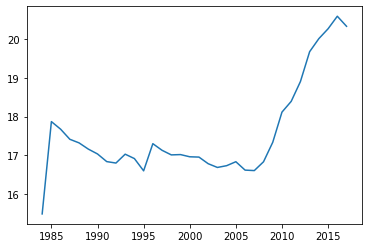

In [73]:
tb_agg_year = tb_veic.groupby(by = 'year').agg(
    mean_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'),
    mean_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'mean')
)
plt.plot(tb_agg_year['mean_city_mpg']);
# Tamanho da amostra por ano - anos com poucos veículos estarão sob risco.
# Categoria dos carros - diversidade da amostra.
# 

**Quais conclusões podemos tirar do gráfico acima? Como podemos melhorar nossa análise?**

In [74]:
tb_agg_cyl = tb_veic.groupby(by = 'cylinders').agg(
    mean_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'),
    mean_highway_mpg = pd.NamedAgg(column = 'highway_mpg', aggfunc = 'mean')
).reset_index()
tb_agg_cyl

,cylinders,mean_city_mpg,mean_highway_mpg
0,2.0,17.000000,22.937500
1,3.0,34.009950,40.323383
2,4.0,21.560323,28.272417
3,5.0,17.785615,24.686030
4,6.0,16.328946,22.661261
5,8.0,13.323331,18.537134
6,10.0,11.653595,18.366013
7,12.0,10.893238,16.969751
8,16.0,8.000000,14.625000


In [75]:
tb_veic = pd.merge(tb_veic, tb_agg_cyl, on = 'cylinders')
tb_veic

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year,mean_city_mpg,mean_highway_mpg
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,21.560323,28.272417
1,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,21.560323,28.272417
2,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500,21.560323,28.272417
3,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400,21.560323,28.272417
4,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500,21.560323,28.272417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,Bugatti,Veyron,2011,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,888.700000,4050,8.000000,14.625000
35948,Bugatti,Veyron,2012,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,888.700000,4050,8.000000,14.625000
35949,Bugatti,Veyron,2013,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,847.000000,4050,8.000000,14.625000
35950,Bugatti,Veyron,2014,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,847.000000,4050,8.000000,14.625000


In [76]:
tb_veic['norm_city_mpg'] = tb_veic['city_mpg']/tb_veic['mean_city_mpg']
tb_veic['norm_highway_mpg'] = tb_veic['highway_mpg']/tb_veic['mean_highway_mpg']
tb_veic

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_by_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_by_mile,fuel_cost_by_year,mean_city_mpg,mean_highway_mpg,norm_city_mpg,norm_highway_mpg
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,21.560323,28.272417,0.834867,0.601293
1,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,21.560323,28.272417,0.742104,0.601293
2,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500,21.560323,28.272417,0.927630,0.919624
3,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400,21.560323,28.272417,1.020393,0.990365
4,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500,21.560323,28.272417,0.881248,0.954994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,Bugatti,Veyron,2011,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,888.700000,4050,8.000000,14.625000,1.000000,1.025641
35948,Bugatti,Veyron,2012,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,888.700000,4050,8.000000,14.625000,1.000000,1.025641
35949,Bugatti,Veyron,2013,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,847.000000,4050,8.000000,14.625000,1.000000,1.025641
35950,Bugatti,Veyron,2014,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,8,15,10,847.000000,4050,8.000000,14.625000,1.000000,1.025641


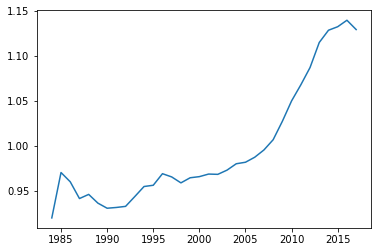

In [79]:
tb_agg_year = tb_veic.groupby(by = 'year').agg(
    mean_city_mpg = pd.NamedAgg(column = 'norm_city_mpg', aggfunc = 'mean'),
    mean_highway_mpg = pd.NamedAgg(column = 'norm_highway_mpg', aggfunc = 'mean'),
    contagem = pd.NamedAgg(column = 'norm_highway_mpg', aggfunc = 'count'),
)
plt.plot(tb_agg_year['mean_city_mpg'])
#plt.plot(tb_agg_year['contagem'])

## What if we had different names?

In [80]:
nome_frutas = ['Uva', 'Abacate', 'Melancia', 'Atemoia', 'Laranja']
producao_frutas = [10, 1, 1, 3, 4]
tb_prod_frutas = pd.DataFrame({'nome_fruta' : nome_frutas,
                               'producao_kg' : producao_frutas})
tb_prod_frutas

,nome_fruta,producao_kg
0,Uva,10
1,Abacate,1
2,Melancia,1
3,Atemoia,3
4,Laranja,4


In [81]:
fruta = ['Uva', 'Abacate', 'Melancia', 'Carambola']
cidade = ['Campinas', 'Campinas', 'Atibaia', 'Rio de Janeiro']
tb_pomar_cidade = pd.DataFrame({'nome_pomar_fruta' : fruta, 'cidade' : cidade})
tb_pomar_cidade

,nome_pomar_fruta,cidade
0,Uva,Campinas
1,Abacate,Campinas
2,Melancia,Atibaia
3,Carambola,Rio de Janeiro


In [82]:
pd.merge(tb_prod_frutas, tb_pomar_cidade, left_on = 'nome_fruta', right_on = 'nome_pomar_fruta')

,nome_fruta,producao_kg,nome_pomar_fruta,cidade
0,Uva,10,Uva,Campinas
1,Abacate,1,Abacate,Campinas
2,Melancia,1,Melancia,Atibaia


In [83]:
tb_agg_yearcyl = tb_veic.groupby(['cylinders', 'year']).agg(
    mean_city_mpg = pd.NamedAgg(column = 'city_mpg', aggfunc = 'mean'),
    n_linhas = pd.NamedAgg(column = 'city_mpg', aggfunc = 'count')
).reset_index()
tb_agg_yearcyl

,cylinders,year,mean_city_mpg,n_linhas
0,2.0,1985,15.0,5
1,2.0,1986,15.0,1
2,2.0,1987,15.0,3
3,2.0,1988,15.0,3
4,2.0,1989,15.0,3
...,...,...,...,...
249,16.0,2011,8.0,1
250,16.0,2012,8.0,1
251,16.0,2013,8.0,1
252,16.0,2014,8.0,1


In [84]:
tb_agg_yearcyl['last_year'] = tb_agg_yearcyl['year'] - 1
tb_agg_yearcyl

,cylinders,year,mean_city_mpg,n_linhas,last_year
0,2.0,1985,15.0,5,1984
1,2.0,1986,15.0,1,1985
2,2.0,1987,15.0,3,1986
3,2.0,1988,15.0,3,1987
4,2.0,1989,15.0,3,1988
...,...,...,...,...,...
249,16.0,2011,8.0,1,2010
250,16.0,2012,8.0,1,2011
251,16.0,2013,8.0,1,2012
252,16.0,2014,8.0,1,2013


In [86]:
tb_agg_yearcyla = pd.merge(tb_agg_yearcyl, tb_agg_yearcyl, 
                           left_on = ['cylinders', 'last_year'], 
                           right_on = ['cylinders', 'year'],
                           suffixes = ('', '_ly'))
tb_agg_yearcyla[tb_agg_yearcyla['cylinders'] == 6]

,cylinders,year,mean_city_mpg,n_linhas,last_year,year_ly,mean_city_mpg_ly,n_linhas_ly,last_year_ly
113,6.0,1985,15.620455,440,1984,1984,14.436275,204,1983
114,6.0,1986,15.436533,323,1985,1985,15.620455,440,1984
115,6.0,1987,15.339100,289,1986,1986,15.436533,323,1985
116,6.0,1988,15.473520,321,1987,1987,15.339100,289,1986
117,6.0,1989,15.219880,332,1988,1988,15.473520,321,1987
118,6.0,1990,15.296636,327,1989,1989,15.219880,332,1988
119,6.0,1991,15.256831,366,1990,1990,15.296636,327,1989
120,6.0,1992,15.221393,402,1991,1991,15.256831,366,1990
121,6.0,1993,15.429268,410,1992,1992,15.221393,402,1991
122,6.0,1994,15.594595,370,1993,1993,15.429268,410,1992


In [87]:
tb_agg_yearcyla['var_anual'] = (tb_agg_yearcyla['mean_city_mpg'] - tb_agg_yearcyla['mean_city_mpg_ly'])/tb_agg_yearcyla['mean_city_mpg_ly']

In [91]:
aa = tb_agg_yearcyla.groupby(['cylinders']).agg(
    var_anual_media = pd.NamedAgg('var_anual', 'mean'),
    min_ano = pd.NamedAgg('year', 'min'),
    max_ano = pd.NamedAgg('year', 'max'),
    n_linhas = pd.NamedAgg('n_linhas', 'sum')
)
aa[aa['n_linhas'] > 149]

,var_anual_media,min_ano,max_ano,n_linhas
cylinders,,,,
3.0,0.010150,1986,2017,193
4.0,0.006574,1985,2017,13290
5.0,0.005944,1986,2016,704
6.0,0.007542,1985,2017,12561
8.0,0.005362,1985,2017,7761
10.0,0.012147,1993,2017,150
12.0,0.006570,1986,2017,560


1.3314728037174717

# Bonus - Bins Concept

![Imgs](https://i.stack.imgur.com/pObHa.png)


### two methods: cut vs qcut

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In [93]:
pd.cut(tb_veic['city_mpg'], bins = 10)

0         (16.4, 21.6]
1         (11.2, 16.4]
2         (16.4, 21.6]
3         (21.6, 26.8]
4         (16.4, 21.6]
             ...      
35947    (5.948, 11.2]
35948    (5.948, 11.2]
35949    (5.948, 11.2]
35950    (5.948, 11.2]
35951    (5.948, 11.2]
Name: city_mpg, Length: 35952, dtype: category
Categories (10, interval[float64]): [(5.948, 11.2] < (11.2, 16.4] < (16.4, 21.6] < (21.6, 26.8] ... (37.2, 42.4] < (42.4, 47.6] < (47.6, 52.8] < (52.8, 58.0]]

In [94]:
tb_veic['classifA_city_mpg'] = pd.cut(tb_veic['city_mpg'], bins = 10)
tb_veic['classifA_city_mpg'].value_counts()

(11.2, 16.4]     13966
(16.4, 21.6]     13764
(21.6, 26.8]      4364
(5.948, 11.2]     2241
(26.8, 32.0]      1211
(32.0, 37.2]       202
(37.2, 42.4]       121
(42.4, 47.6]        47
(47.6, 52.8]        27
(52.8, 58.0]         9
Name: classifA_city_mpg, dtype: int64

In [95]:
tb_veic['classifB_city_mpg'] = pd.qcut(tb_veic['city_mpg'], q = 10)
tb_veic['classifB_city_mpg'].value_counts()

(12.0, 14.0]     4719
(14.0, 15.0]     4158
(19.0, 21.0]     3898
(5.999, 12.0]    3753
(16.0, 17.0]     3690
(15.0, 16.0]     3577
(17.0, 18.0]     3547
(23.0, 58.0]     3407
(18.0, 19.0]     2629
(21.0, 23.0]     2574
Name: classifB_city_mpg, dtype: int64

# Bonus - Categorical Data Into Columns

>    - dummies
>    - One hot encoding

In [96]:
pd.get_dummies(tb_veic['classifB_city_mpg'])

,"(5.999, 12.0]","(12.0, 14.0]","(14.0, 15.0]","(15.0, 16.0]","(16.0, 17.0]","(17.0, 18.0]","(18.0, 19.0]","(19.0, 21.0]","(21.0, 23.0]","(23.0, 58.0]"
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35947,1,0,0,0,0,0,0,0,0,0
35948,1,0,0,0,0,0,0,0,0,0
35949,1,0,0,0,0,0,0,0,0,0
35950,1,0,0,0,0,0,0,0,0,0


In [97]:
dummies = pd.get_dummies(tb_veic['classifB_city_mpg'])
pd.concat([tb_veic, dummies], axis = 1)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_by_year,...,"(5.999, 12.0]","(12.0, 14.0]","(14.0, 15.0]","(15.0, 16.0]","(16.0, 17.0]","(17.0, 18.0]","(18.0, 19.0]","(19.0, 21.0]","(21.0, 23.0]","(23.0, 58.0]"
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,...,0,0,0,0,0,1,0,0,0,0
1,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,...,0,0,0,1,0,0,0,0,0,0
2,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,...,0,0,0,0,0,0,0,1,0,0
3,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,...,0,0,0,0,0,0,0,0,1,0
4,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,Bugatti,Veyron,2011,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,...,1,0,0,0,0,0,0,0,0,0
35948,Bugatti,Veyron,2012,8.0,16.0,Automatic (S7),All-Wheel Drive,Two Seaters,Premium,32.961000,...,1,0,0,0,0,0,0,0,0,0
35949,Bugatti,Veyron,2013,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,...,1,0,0,0,0,0,0,0,0,0
35950,Bugatti,Veyron,2014,8.0,16.0,Auto(AM-S7),All-Wheel Drive,Two Seaters,Premium,32.961000,...,1,0,0,0,0,0,0,0,0,0
